In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [15]:
dataset=pd.read_csv('car data.csv')

In [16]:
dataset.shape

(301, 9)

Checking for missing values if any

In [17]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Dropping 'Car_Name' column since it will be of no use in the prediction

In [19]:

dataset=dataset.drop(['Car_Name'],axis=1)

In [20]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Adding a Current_Year column

In [21]:
dataset['Current_Year']=2021
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


Calculating age of car and creating a column for that

In [22]:
dataset['Age_of_car']=dataset['Current_Year']-dataset['Year']
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age_of_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


Plotting age_of_car vs Selling_price

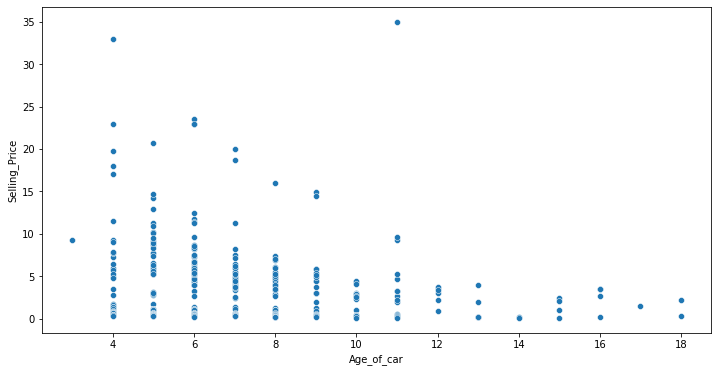

In [23]:
import seaborn as sns
plt.figure(figsize=[12,6])
sns.scatterplot(x='Age_of_car',y='Selling_Price',data=dataset)

Plotting age_of_car vs kilometers driven

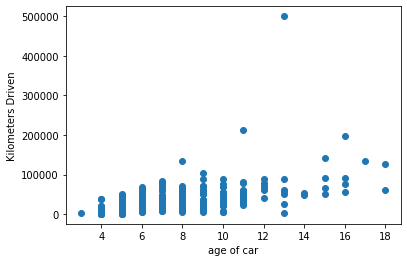

In [24]:
plt.scatter(dataset['Age_of_car'],dataset['Kms_Driven'])

plt.xlabel('age of car')
plt.ylabel('Kilometers Driven')
plt.show()

Dropping Year column

In [25]:
dataset.drop(['Year'],axis=1,inplace=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age_of_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


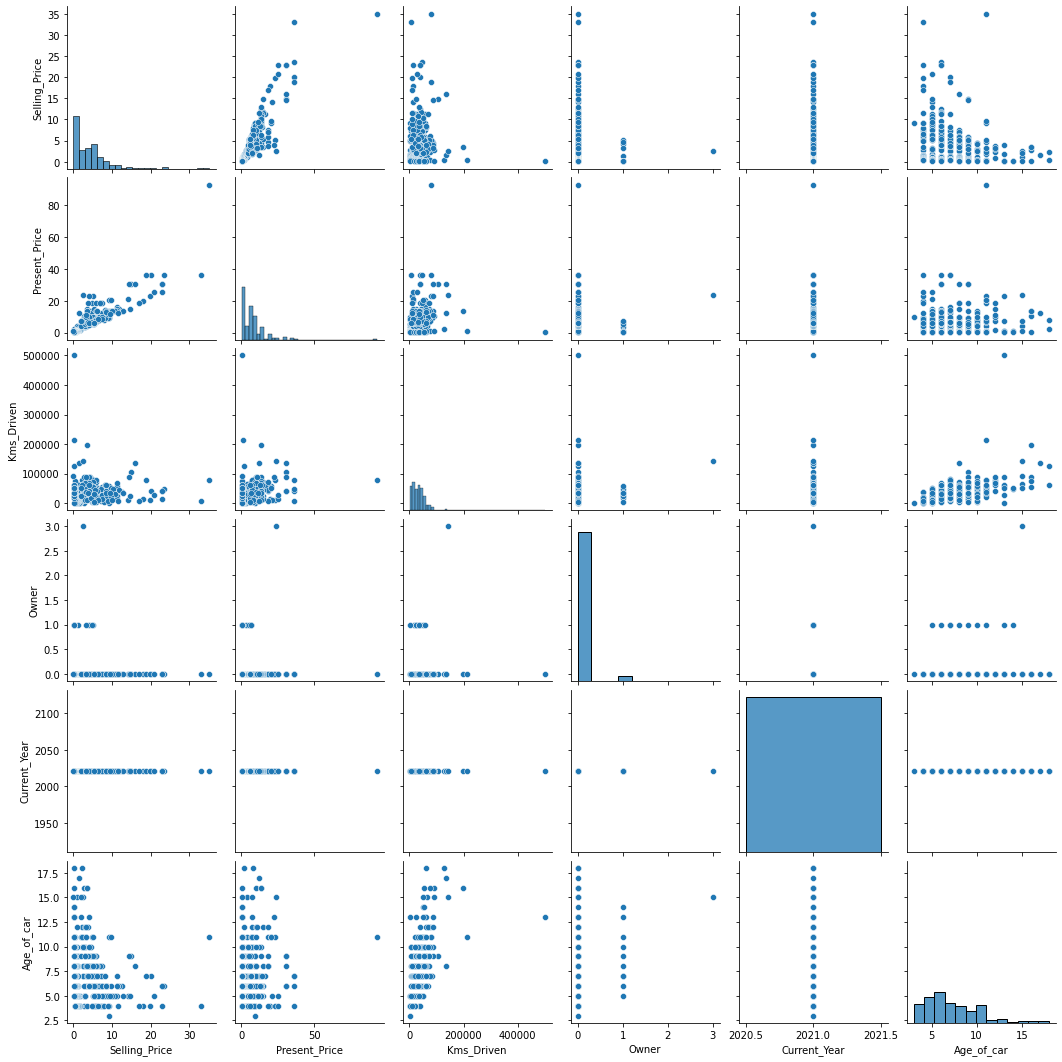

In [26]:
import seaborn as sns
sns.pairplot(dataset)

One-hot encoding the fuel_type,seller_type and transmissionn columns

In [27]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2021,7,0,1,0,1
1,4.75,9.54,43000,0,2021,8,1,0,0,1
2,7.25,9.85,6900,0,2021,4,0,1,0,1
3,2.85,4.15,5200,0,2021,10,0,1,0,1
4,4.60,6.87,42450,0,2021,7,1,0,0,1


Creating X and Y

In [28]:
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]


In [29]:
X.head()


,Present_Price,Kms_Driven,Owner,Current_Year,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,2021,7,0,1,0,1
1,9.54,43000,0,2021,8,1,0,0,1
2,9.85,6900,0,2021,4,0,1,0,1
3,4.15,5200,0,2021,10,0,1,0,1
4,6.87,42450,0,2021,7,1,0,0,1


In [30]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

Seeing which features are most important

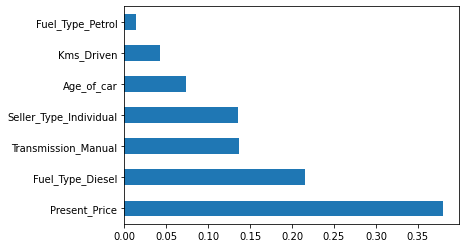

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

Splitting into training and test set

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25)

In [33]:
Y_train.head()

67     9.25
258    8.40
190    0.20
206    5.75
81     4.75
Name: Selling_Price, dtype: float64

In [34]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Current_Year,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
67,20.45,59000,0,2021,11,1,0,0,1
258,13.60,25000,0,2021,6,0,1,0,1
190,0.75,60000,0,2021,13,0,1,1,1
206,7.13,12479,0,2021,4,0,1,0,1
81,7.85,40000,0,2021,6,1,0,0,1


Building Random Forest Regression Model

In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Making a single prediction

In [36]:
regressor.predict([[5.00,20000,0,2021,10,1,0,1,1]])

array([2.34325])

In [37]:
y_pred=regressor.predict(X_test)

In [38]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.values.reshape(len(Y_test),1)),1))

[[ 0.44206  0.45   ]
 [ 9.77377  9.7    ]
 [ 2.5589   2.75   ]
 [ 0.52604  0.6    ]
 [ 0.41342  0.4    ]
 [ 5.5826   4.35   ]
 [ 0.47797  0.5    ]
 [ 1.47497  1.65   ]
 [ 0.45245  0.65   ]
 [ 3.1394   3.5    ]
 [ 5.3111   5.25   ]
 [ 6.17935  4.75   ]
 [ 0.42509  0.45   ]
 [ 5.23635  4.85   ]
 [ 3.1045   2.     ]
 [ 3.31961  3.75   ]
 [ 6.1866   5.85   ]
 [ 1.09098  1.1    ]
 [ 6.11265  7.2    ]
 [ 0.63618  0.75   ]
 [ 1.15025  1.2    ]
 [ 7.70567  7.75   ]
 [ 6.3728   3.49   ]
 [ 5.2641   4.4    ]
 [ 1.26177  1.15   ]
 [ 7.7693   6.5    ]
 [ 3.66525  3.25   ]
 [16.03971 19.75   ]
 [ 0.27338  0.2    ]
 [ 0.34686  0.42   ]
 [ 0.40991  0.35   ]
 [ 2.98235  2.85   ]
 [ 4.3161   4.     ]
 [ 0.3562   0.18   ]
 [ 4.50165  3.35   ]
 [ 7.09513  6.     ]
 [ 0.13073  0.2    ]
 [ 0.28428  0.25   ]
 [ 0.74331  0.78   ]
 [ 1.15341  0.35   ]
 [ 8.45098  9.5    ]
 [ 3.3796   2.75   ]
 [ 4.73374  5.75   ]
 [ 0.42509  0.48   ]
 [ 1.55744  1.45   ]
 [ 5.61348  2.5    ]
 [ 0.47245  0.5    ]
 [ 1.47511  1

Text(0.5, 1.0, 'Random Forest Regression Model')

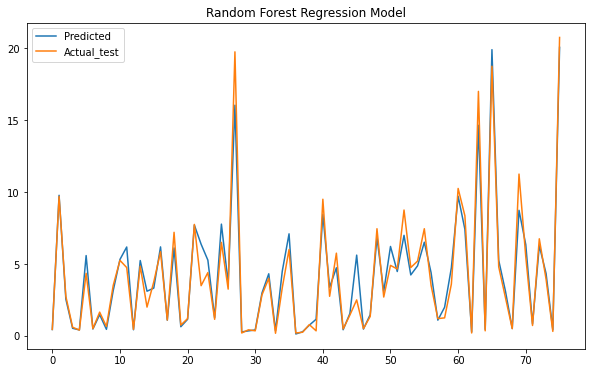

In [39]:
plt.figure(figsize=[10,6])
plt.plot(y_pred,label='Predicted')
plt.plot(Y_test.values,label="Actual_test")
plt.legend()
plt.title("Random Forest Regression Model")

In [40]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.9530108318049924